This is the code for the Example 11. in the main text.
The following image is the SCM that we implement.

- Unobserved nodes: $X_1, X_4$
- Cause node: $X_2$
- Outcome node: $X_5$
- Node that satisfies the backdoor criterion for a pair $(X_2, X_5)$: $X_3$

<div>
<img src="../SCM_fig/SCM1.png" width="600"/>
</div>

- the structural equation: $X_i = f(PA(X_i)) + U_i$
  - $X_1 = U_1$
  - $X_2 = \frac{\sqrt{|X_1|} (|U_2| + 0.1)}{2} + |X_1| + \frac{U_2}{5}$
  - $X_3 = \frac{1}{1 + (|U_3| + 0.1) \exp(-X_2)}$
  - $X_4 = X_3 + X_3 U_4 + U_4$
  - $X_5 = X_2 + X_4 + X_2 X_4 U_5 + U_5$


In [1]:
# Import libraries
import numpy as np

import torch
import torch.nn.functional
import torch.utils.data
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.ioff()  # 対話モードを無効にする

# Warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from func import normalize
from SCM1 import SCM1


  0%|          | 0/5 [00:00<?, ?it/s]

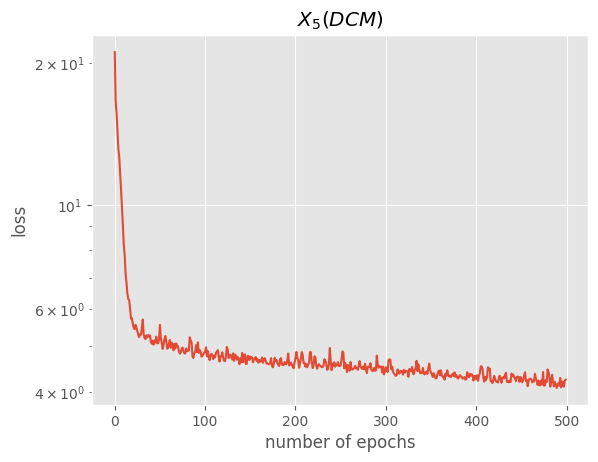

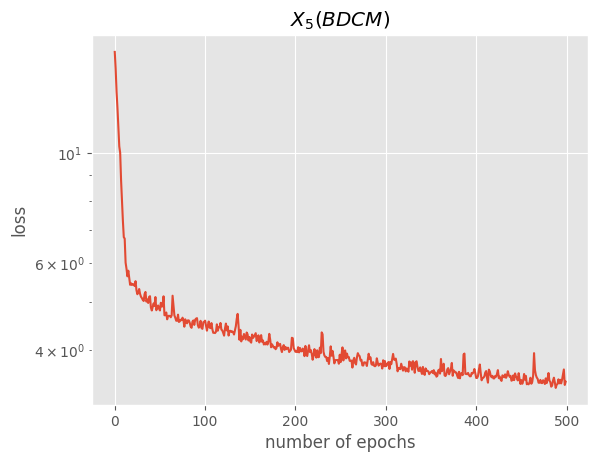

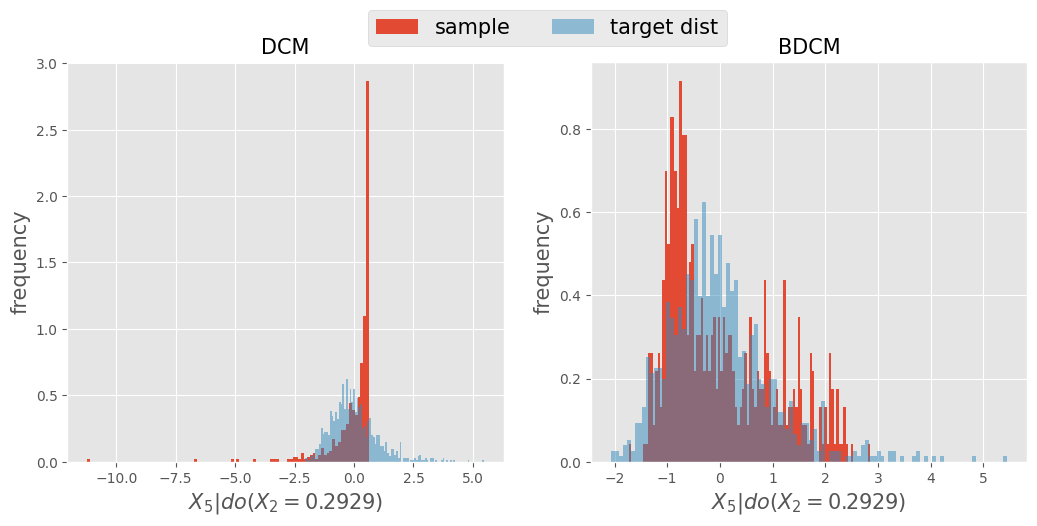

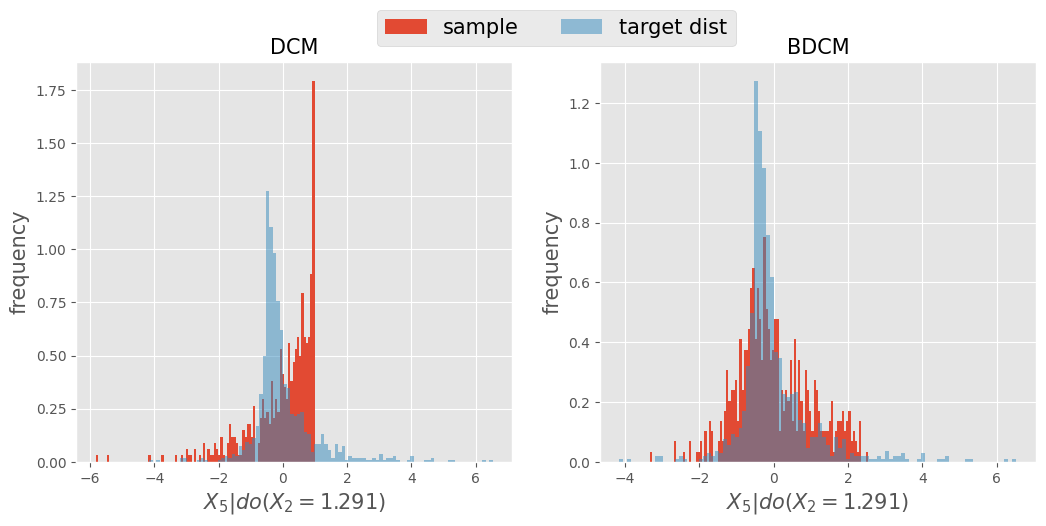

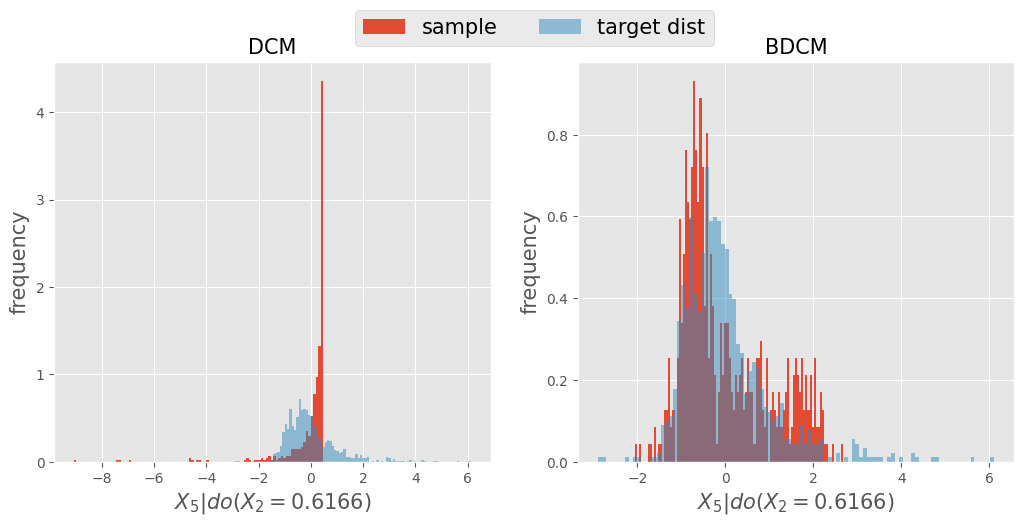

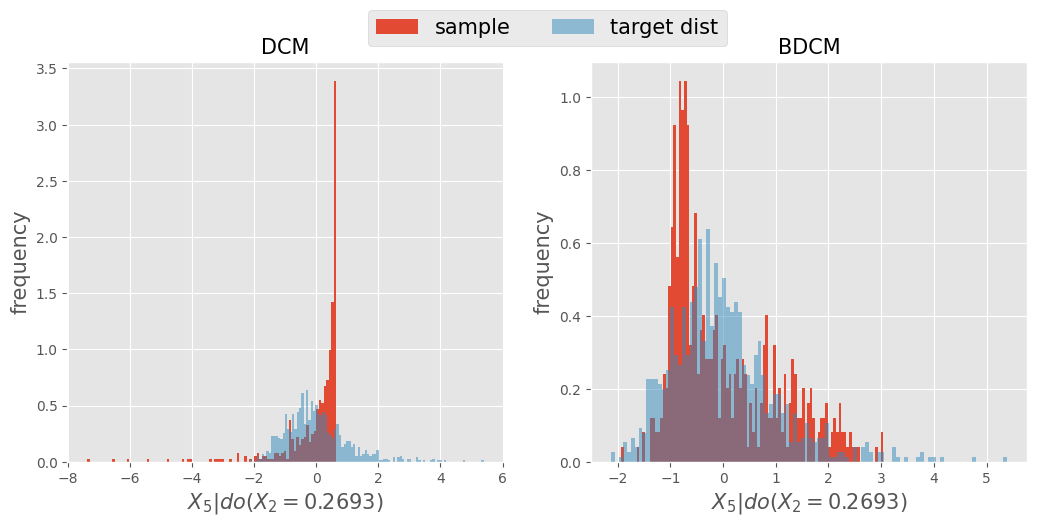

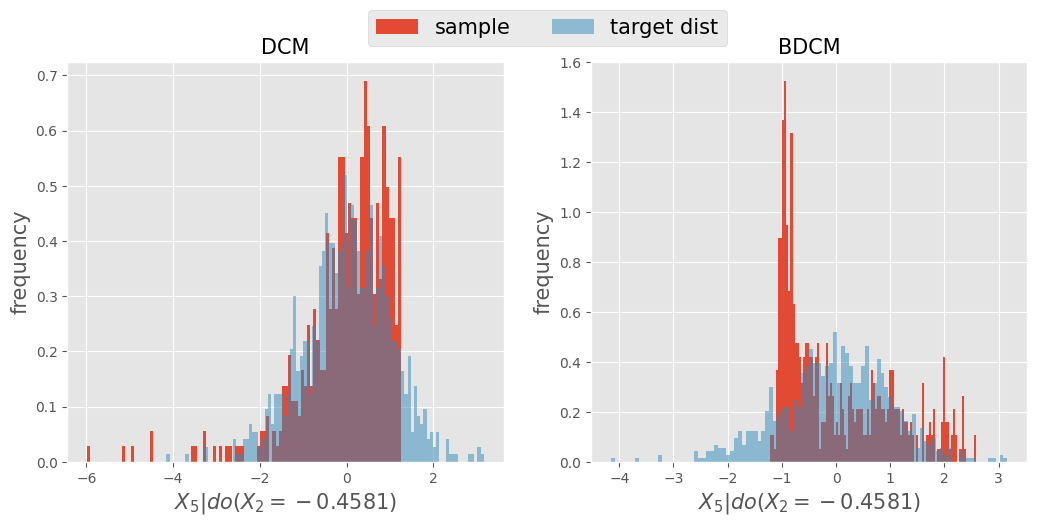

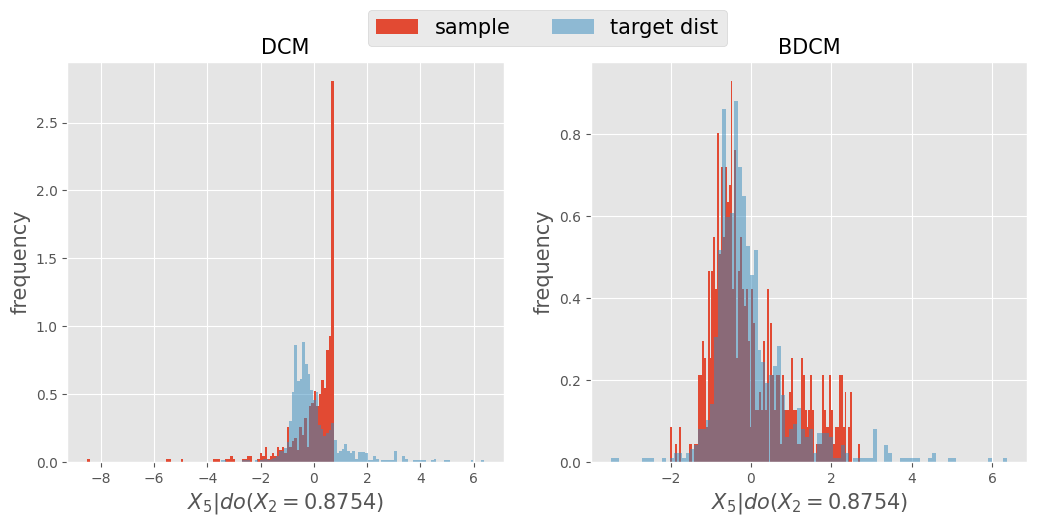

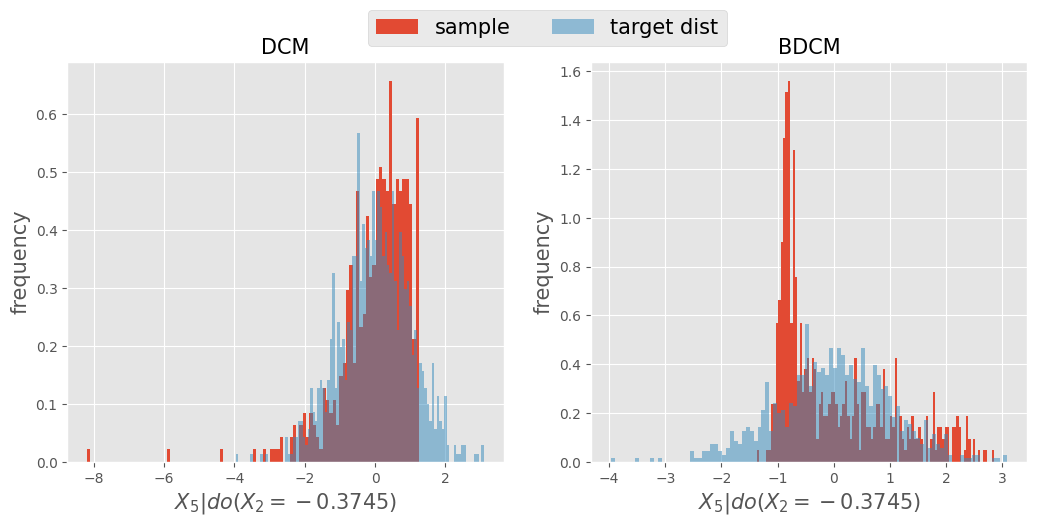

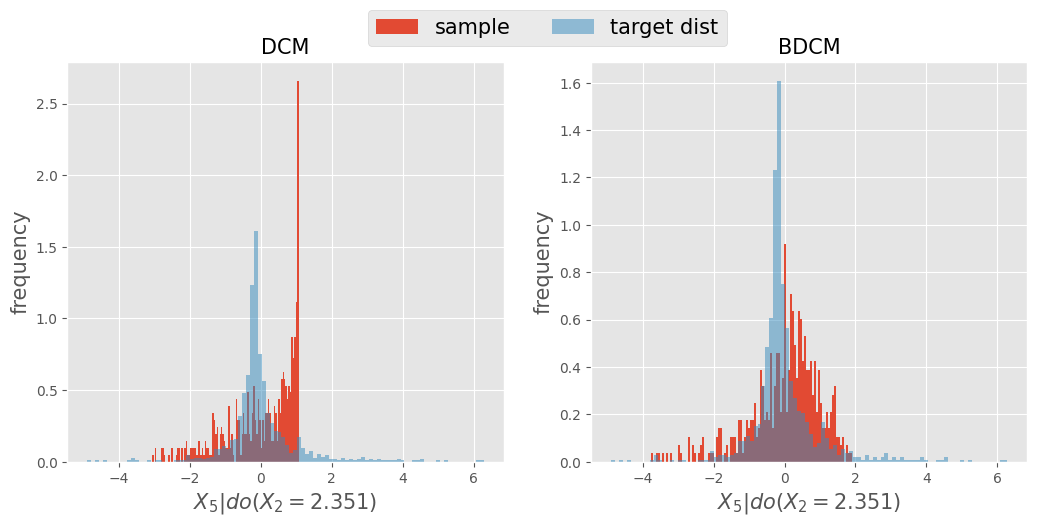

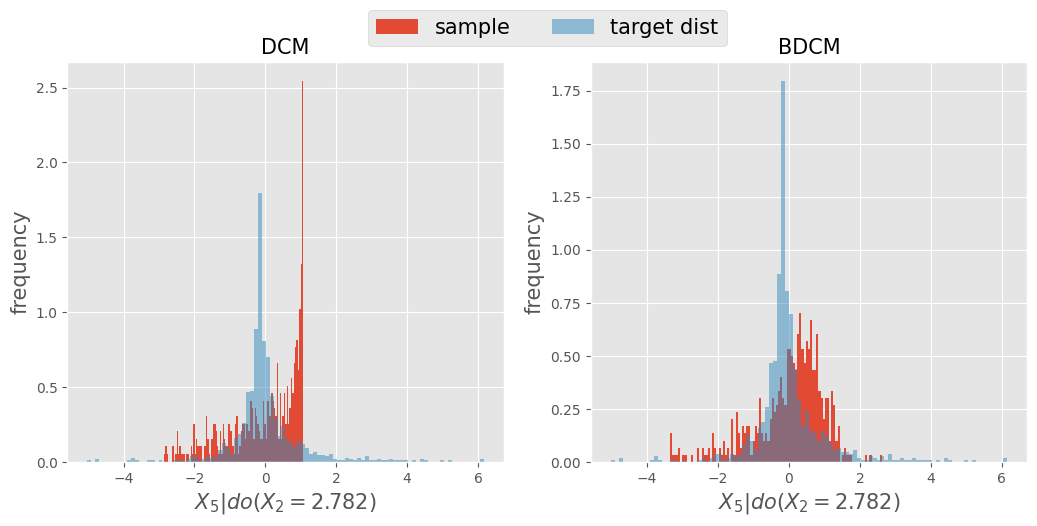

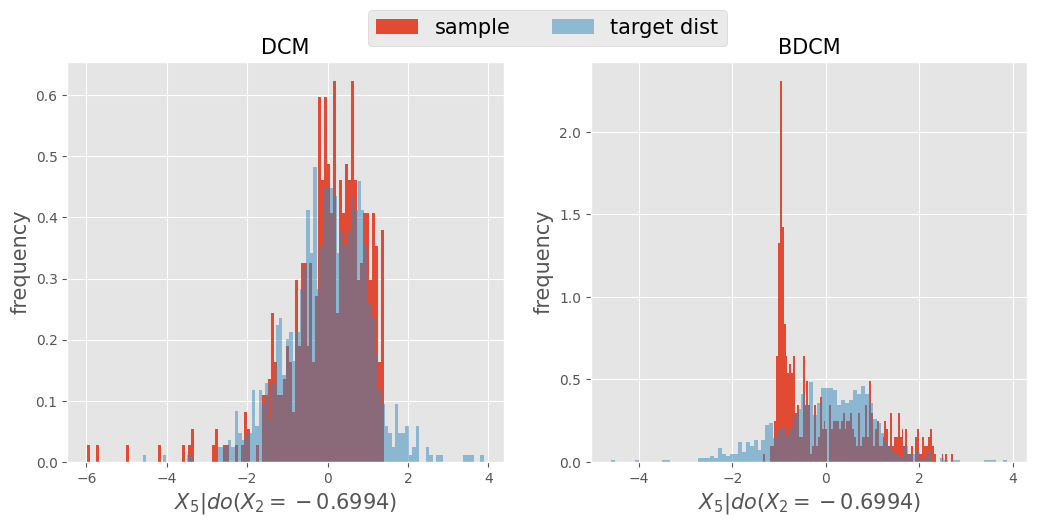

 20%|██        | 1/5 [04:34<18:16, 274.19s/it]

mean of MMD for DCM: 0.00451
standard deviation of MMD for DCM: 0.00254
mean of MMD for BDCM: 0.00163
standard deviation of MMD for BDCM: 0.00117


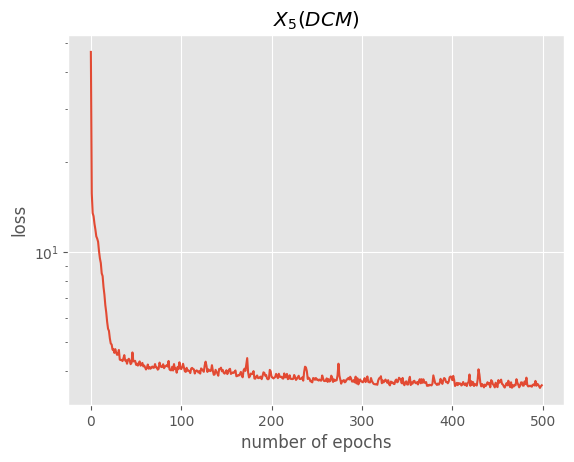

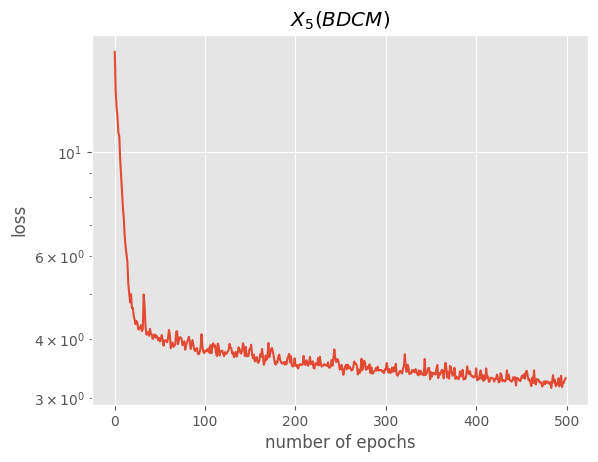

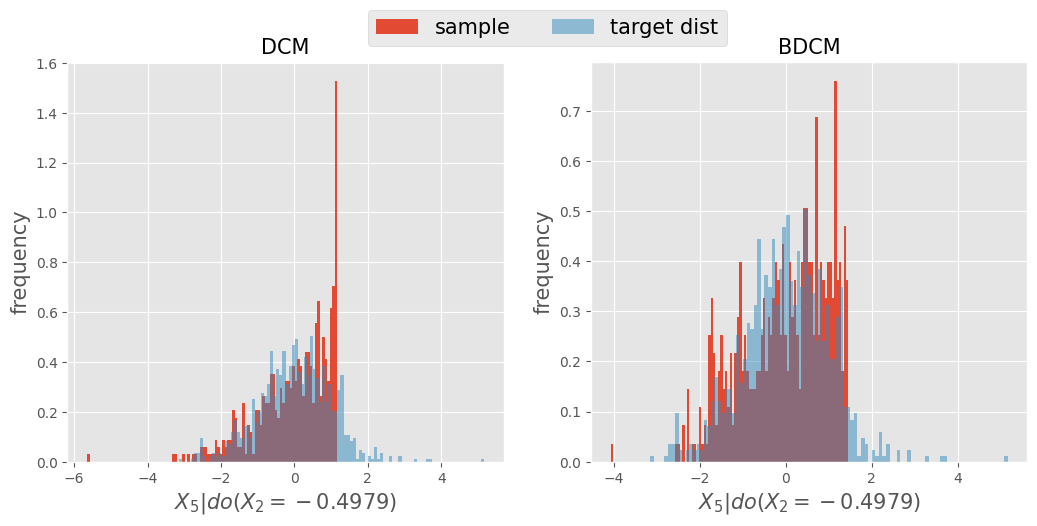

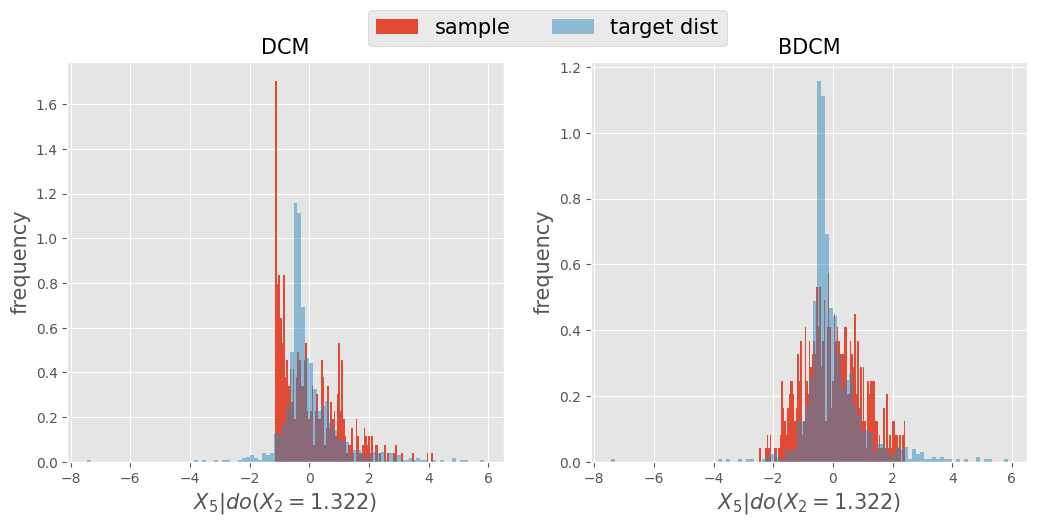

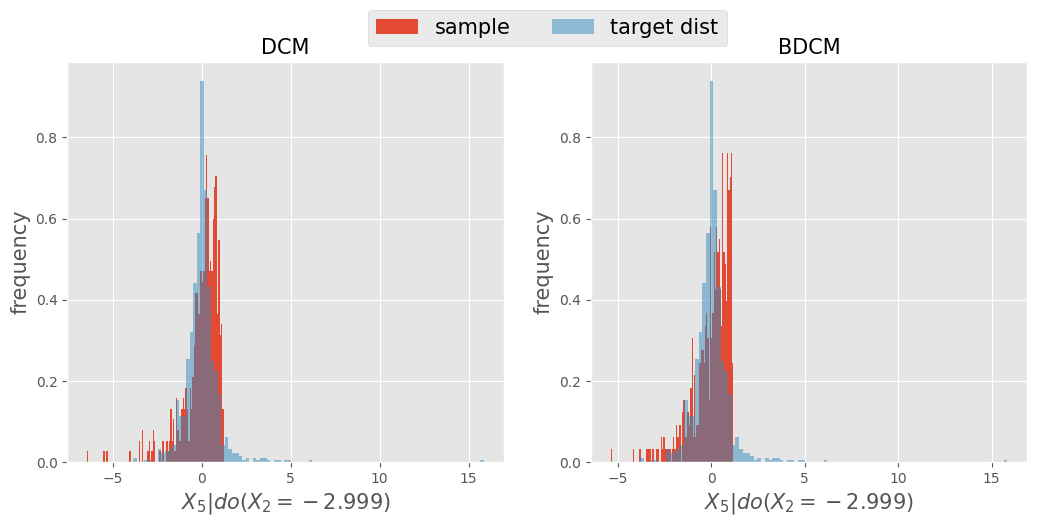

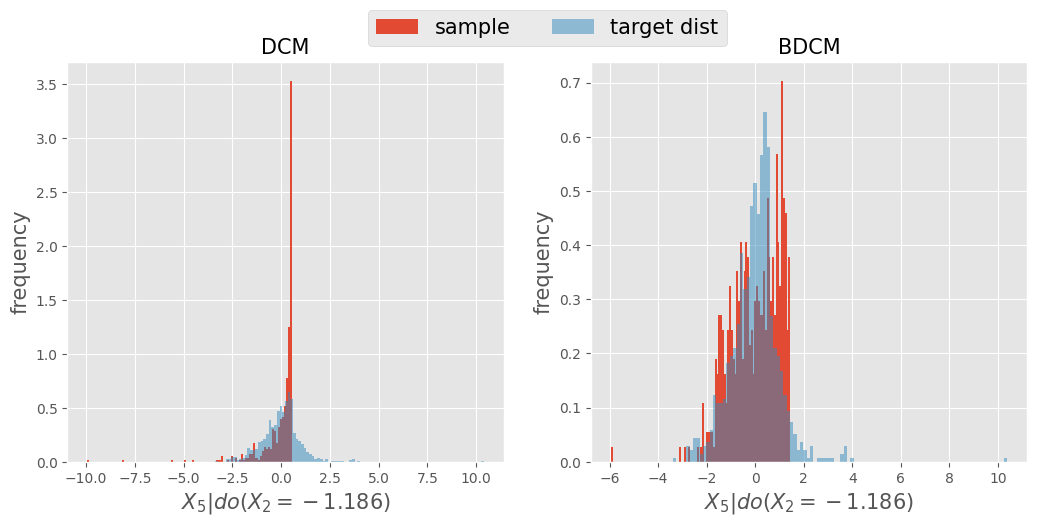

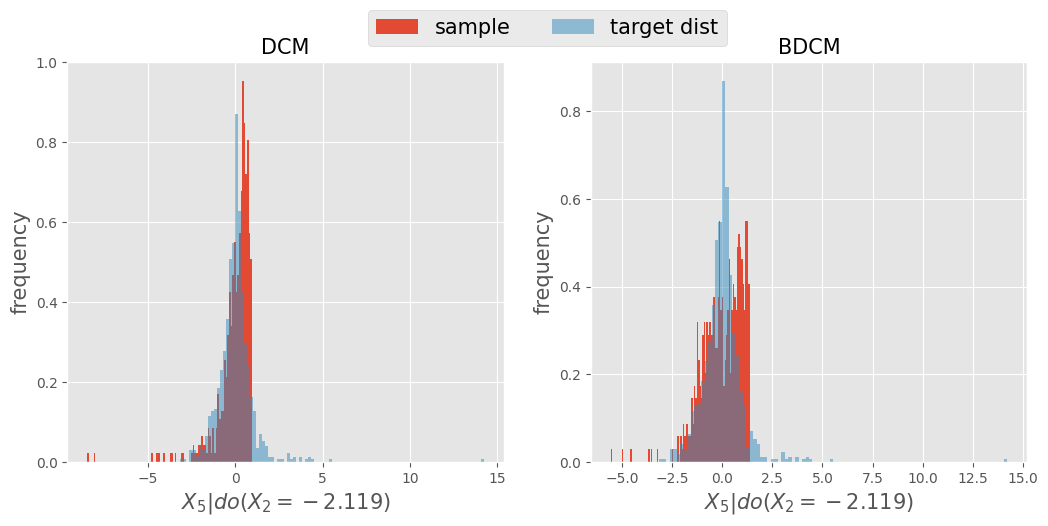

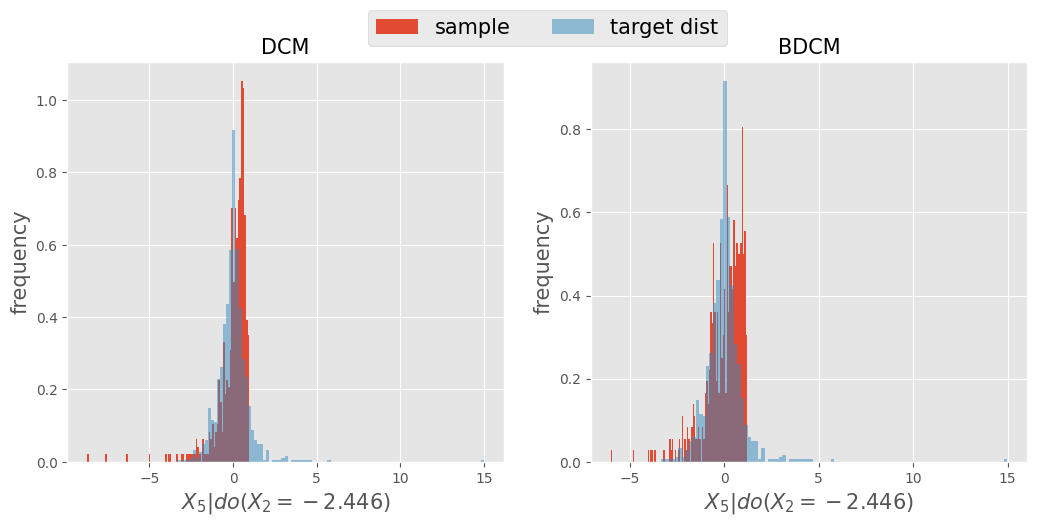

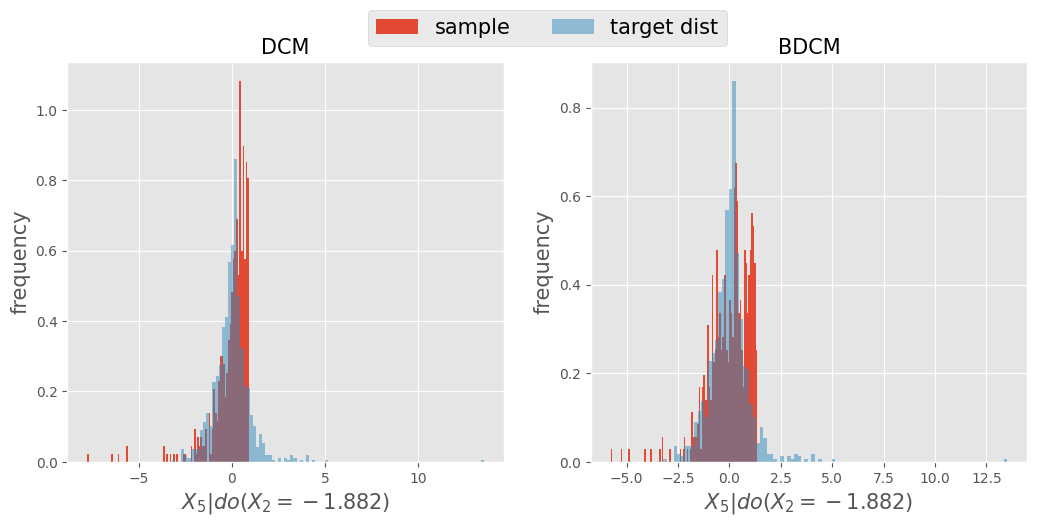

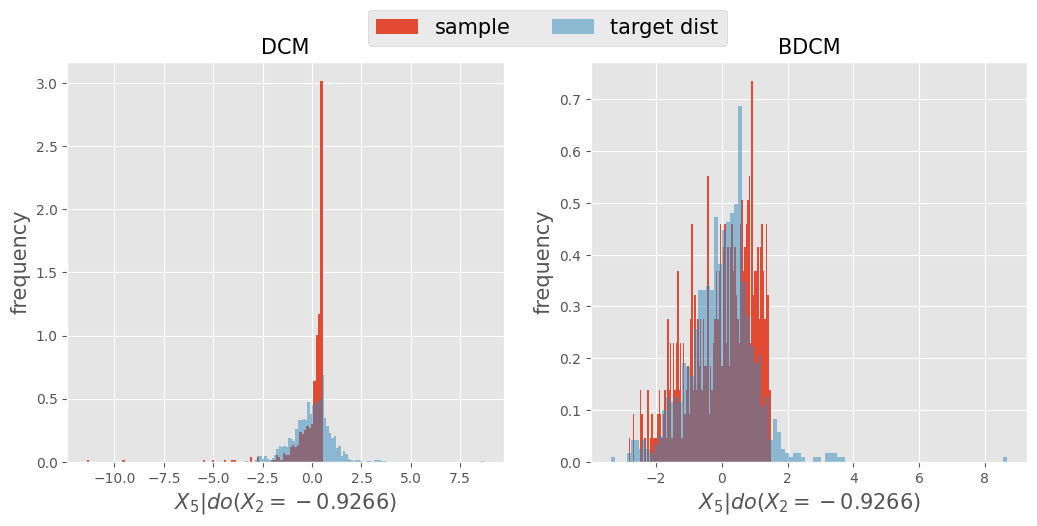

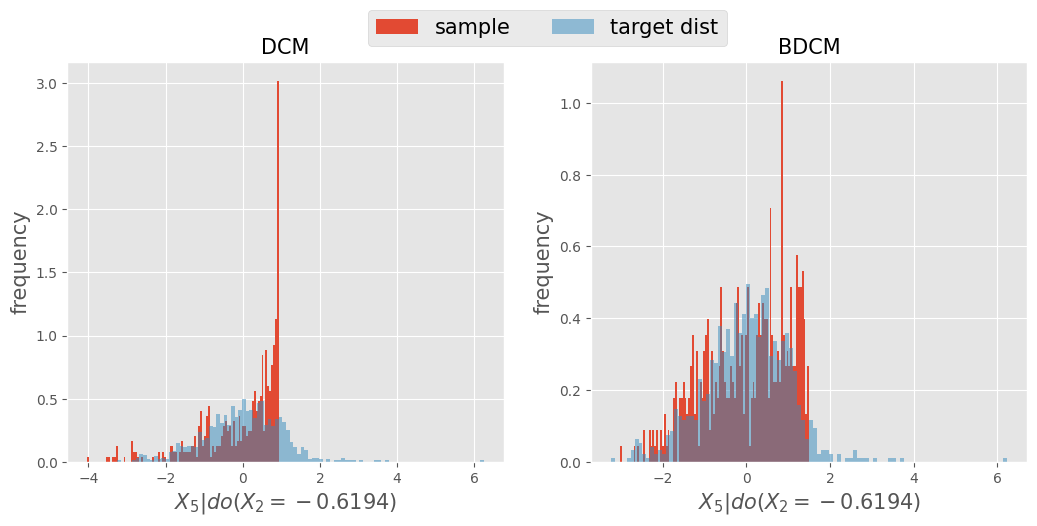

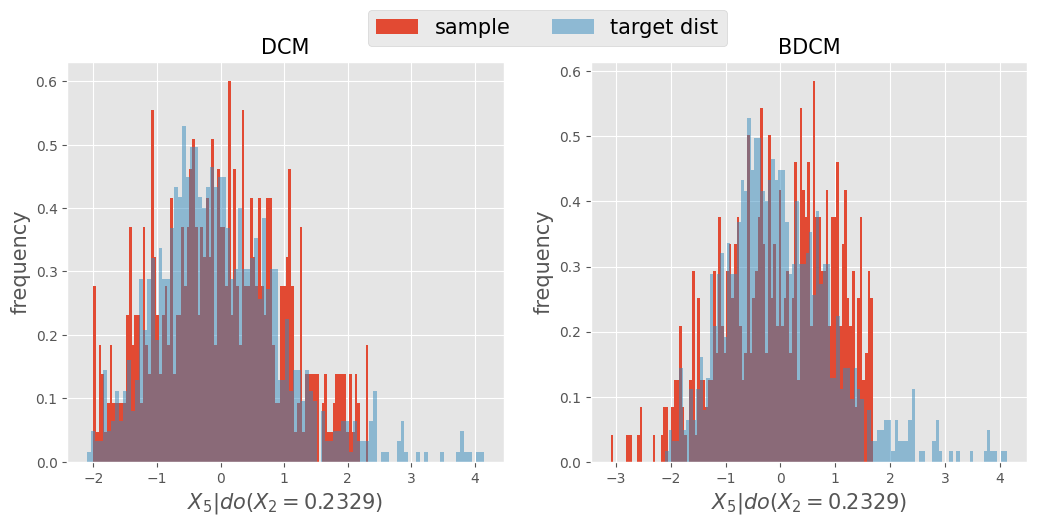

 40%|████      | 2/5 [09:01<13:30, 270.26s/it]

mean of MMD for DCM: 0.00235
standard deviation of MMD for DCM: 0.00151
mean of MMD for BDCM: 0.00119
standard deviation of MMD for BDCM: 0.000872


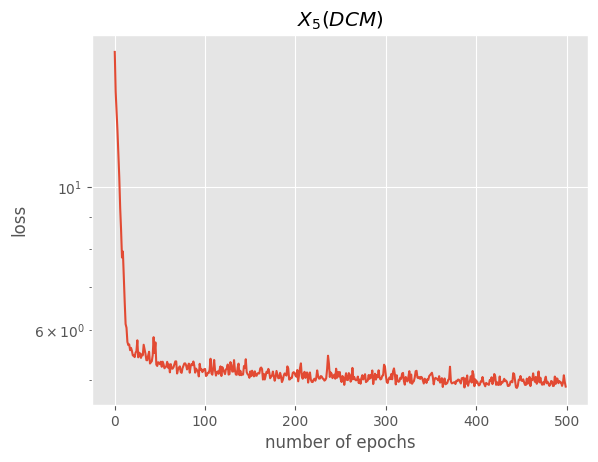

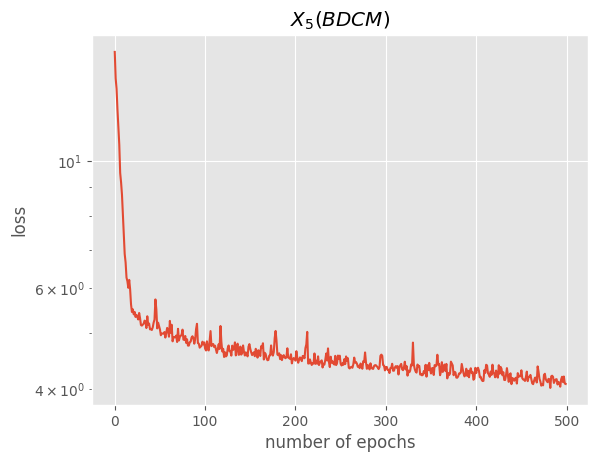

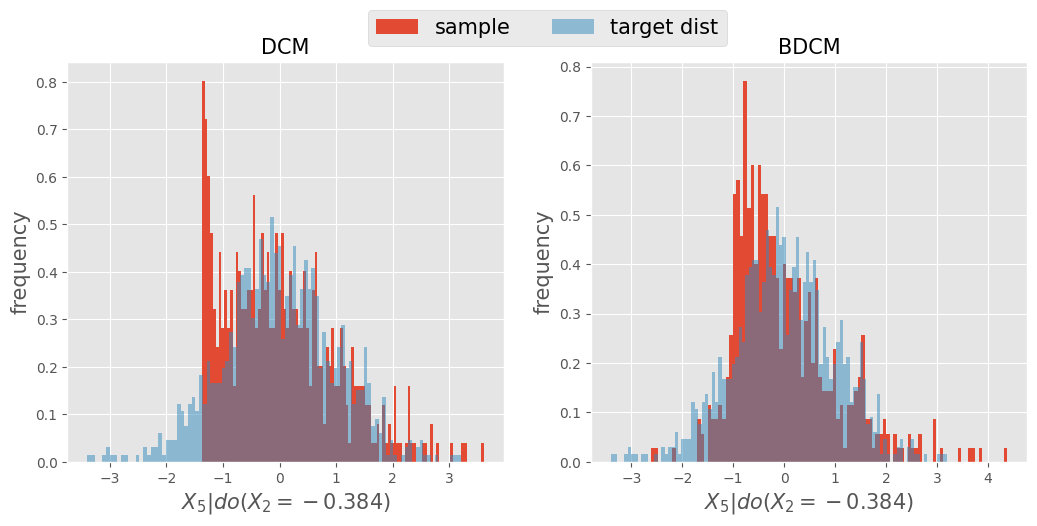

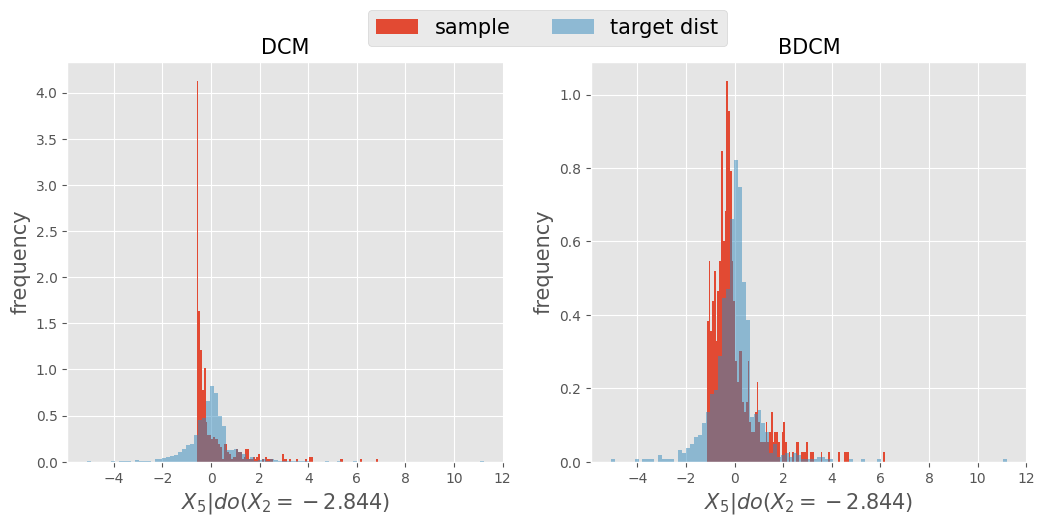

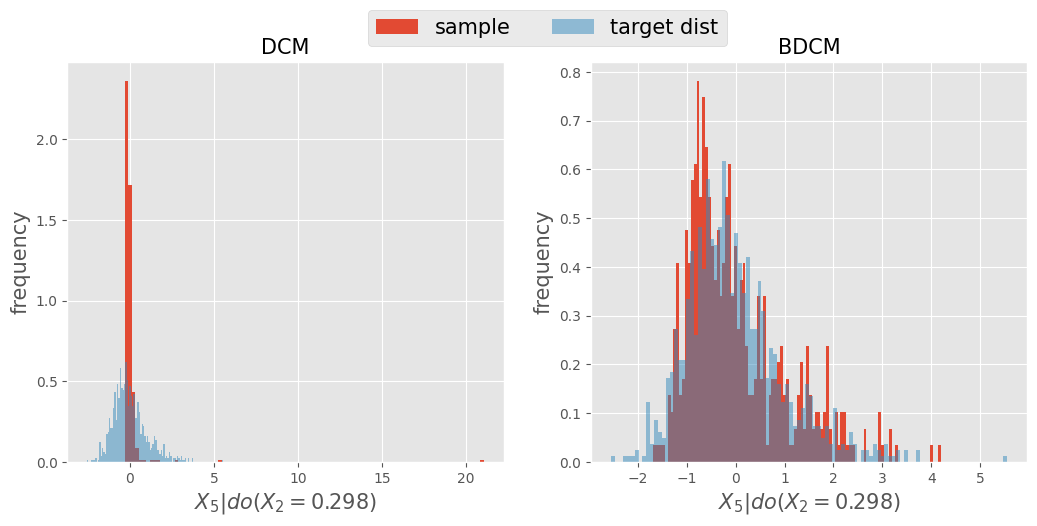

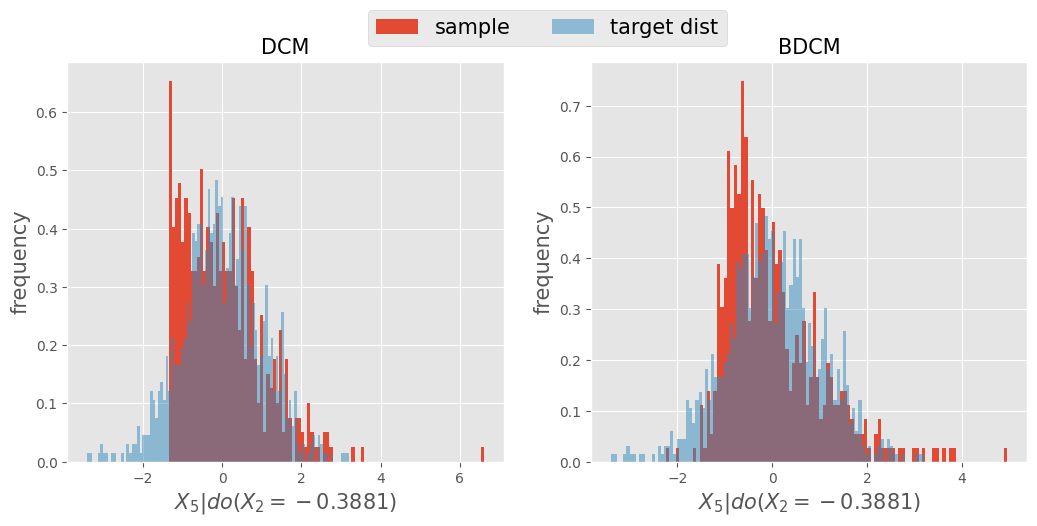

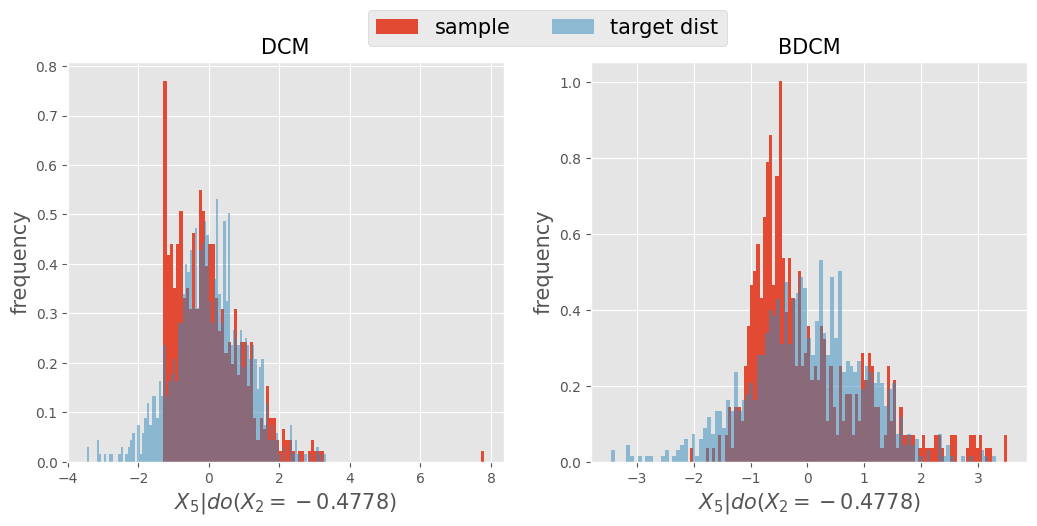

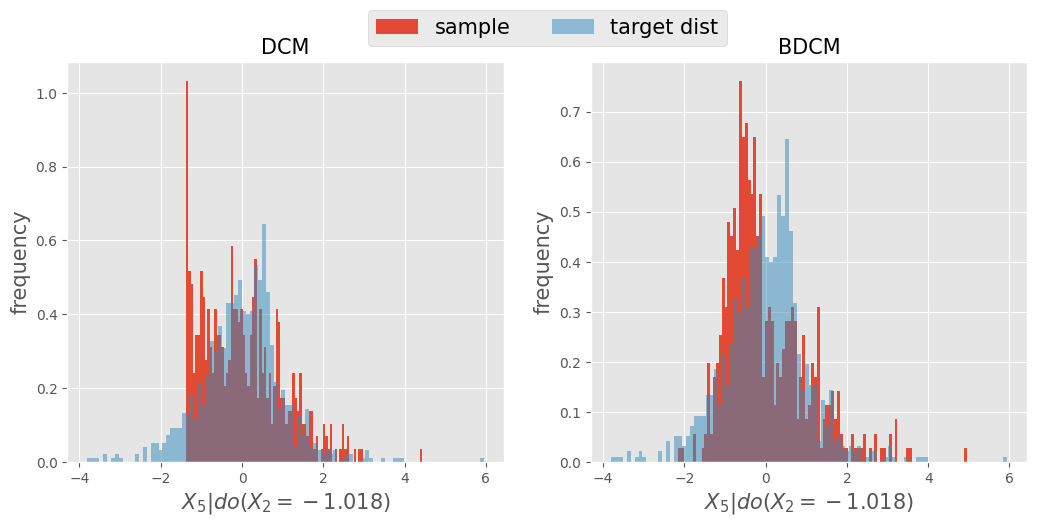

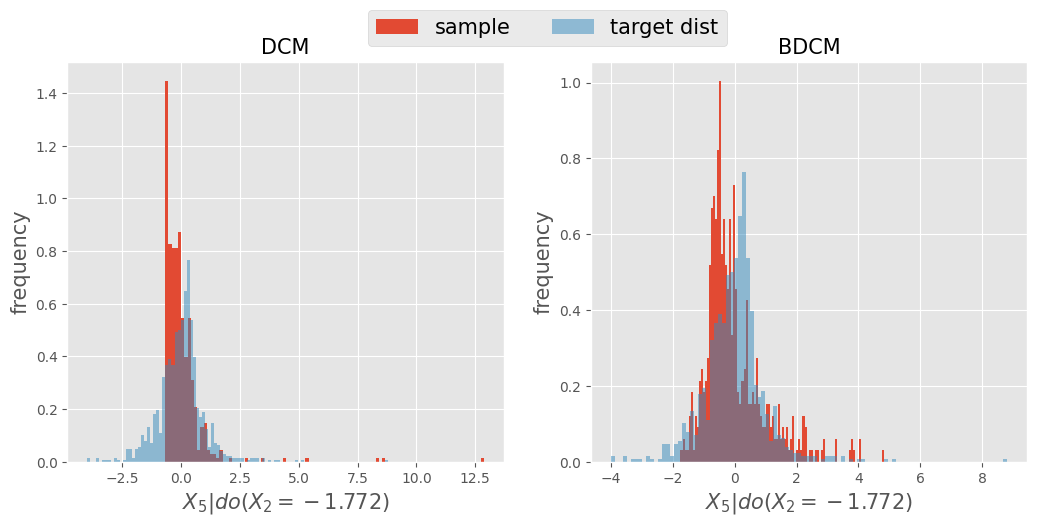

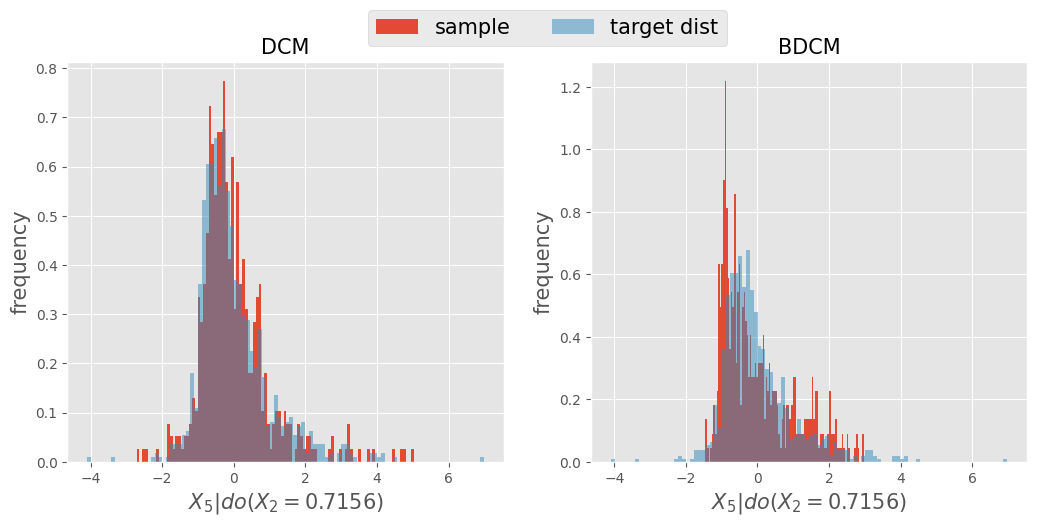

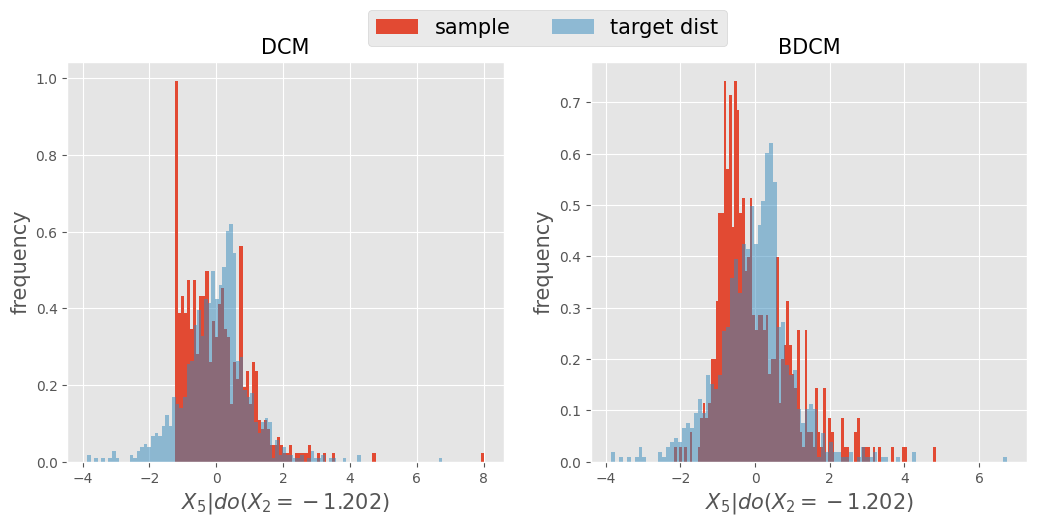

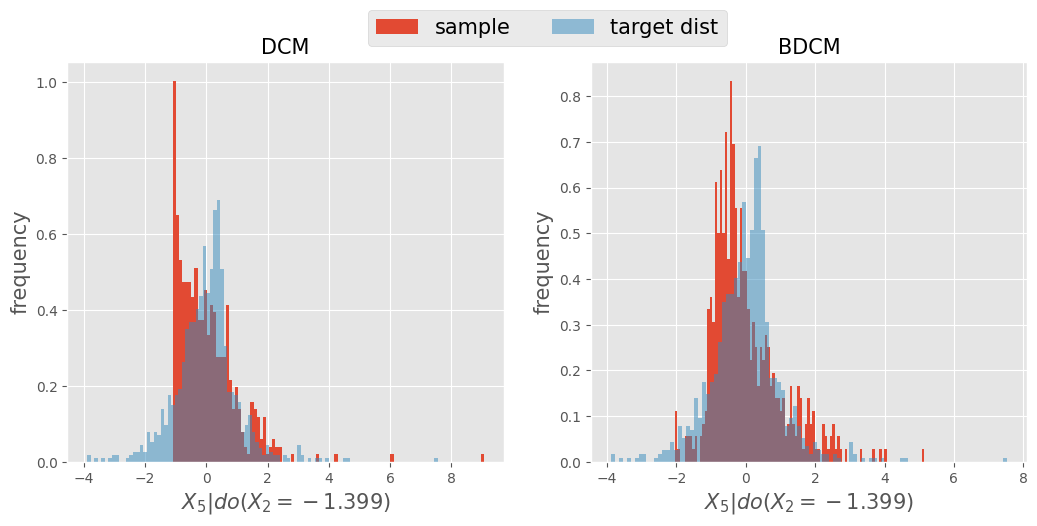

 60%|██████    | 3/5 [13:33<09:01, 270.80s/it]

mean of MMD for DCM: 0.00139
standard deviation of MMD for DCM: 0.00272
mean of MMD for BDCM: 0.000386
standard deviation of MMD for BDCM: 0.000136


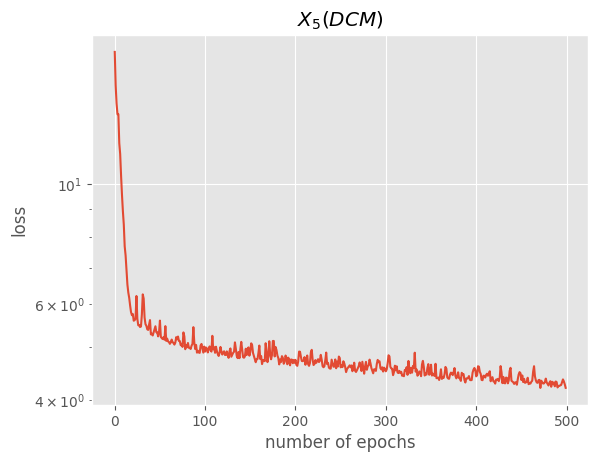

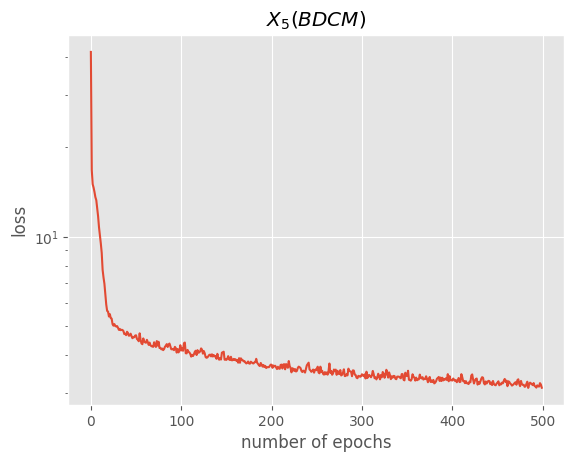

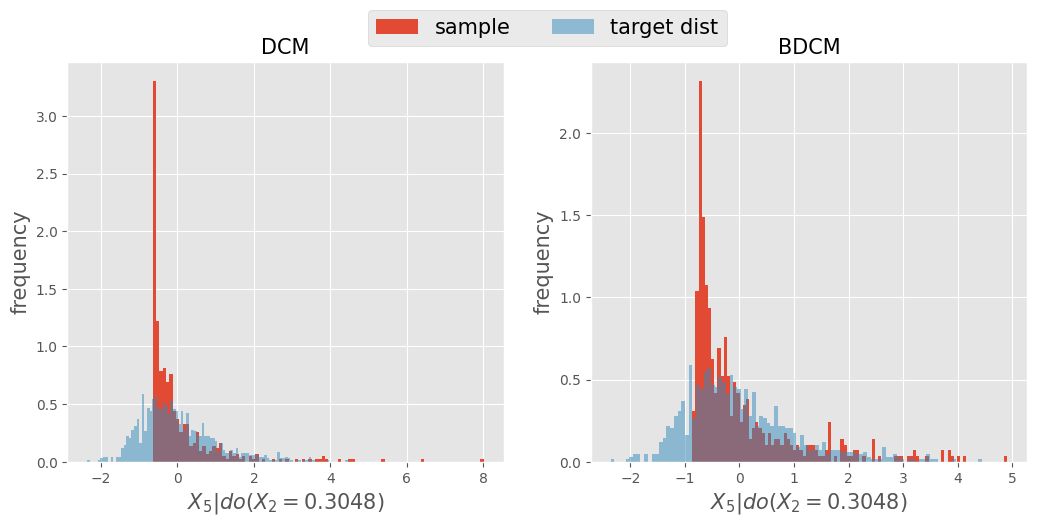

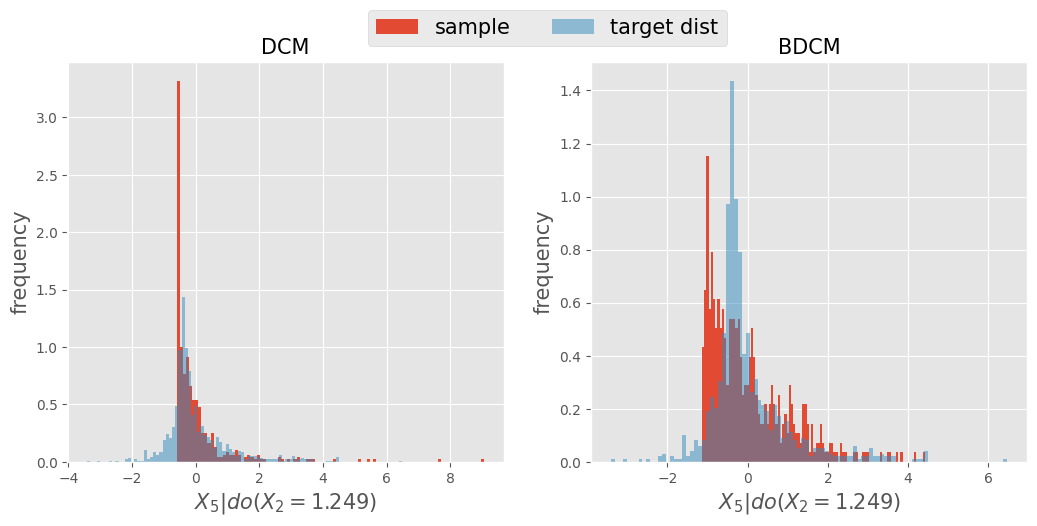

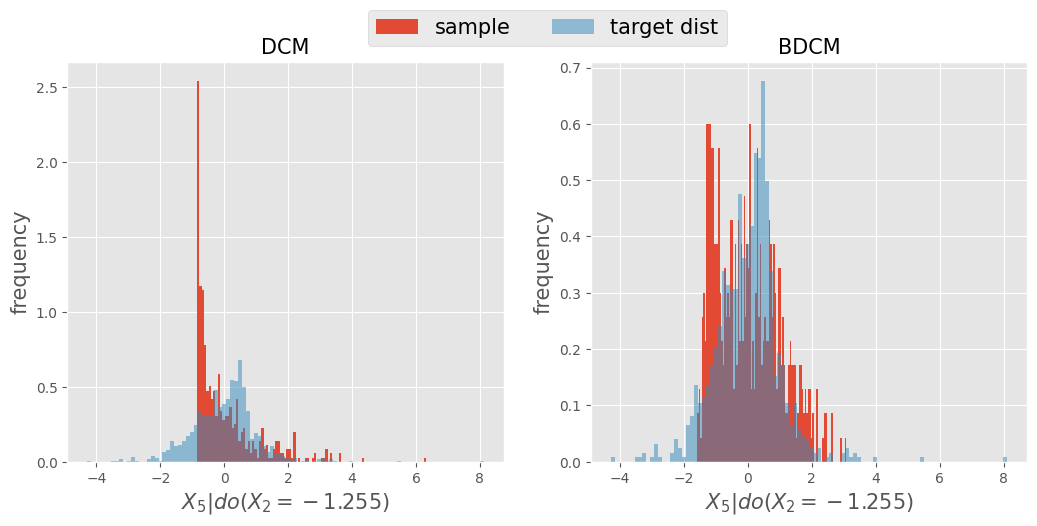

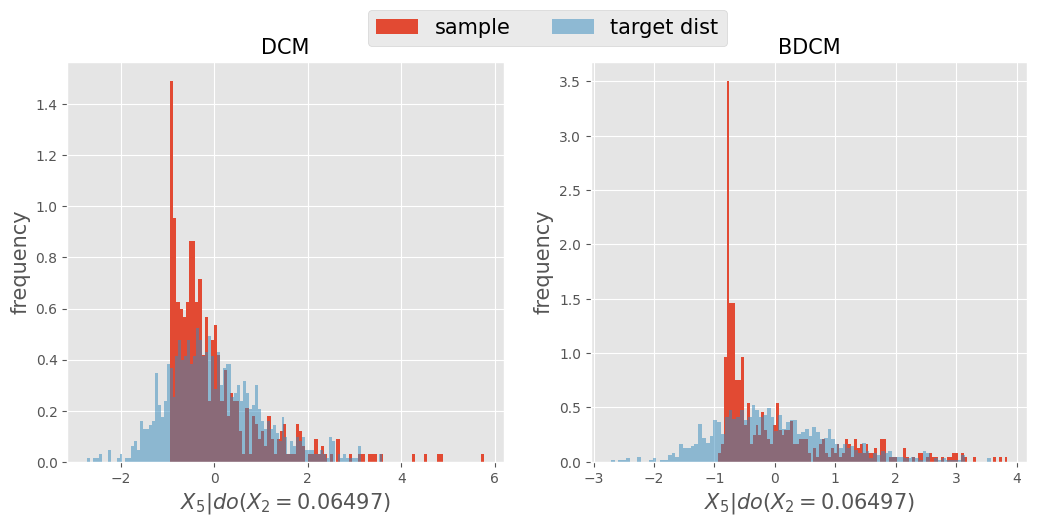

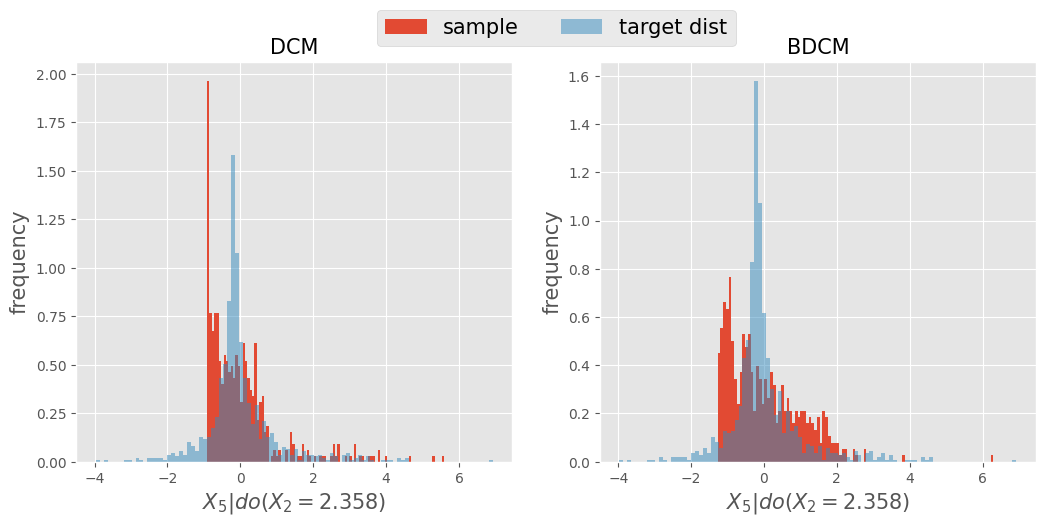

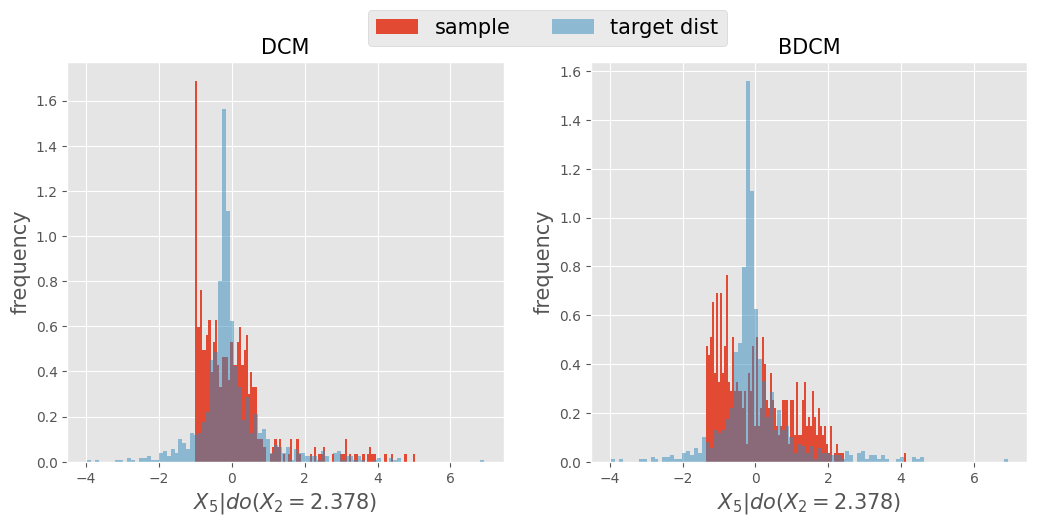

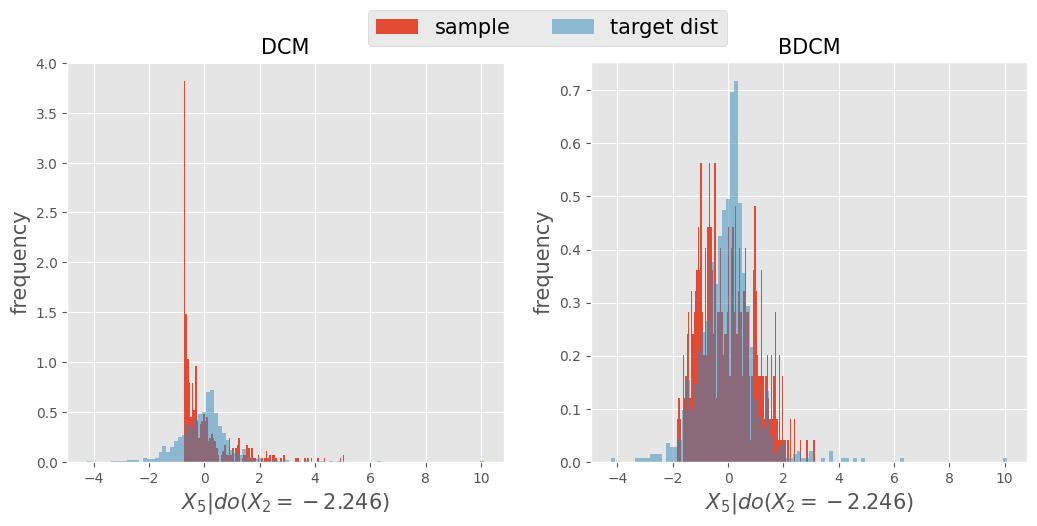

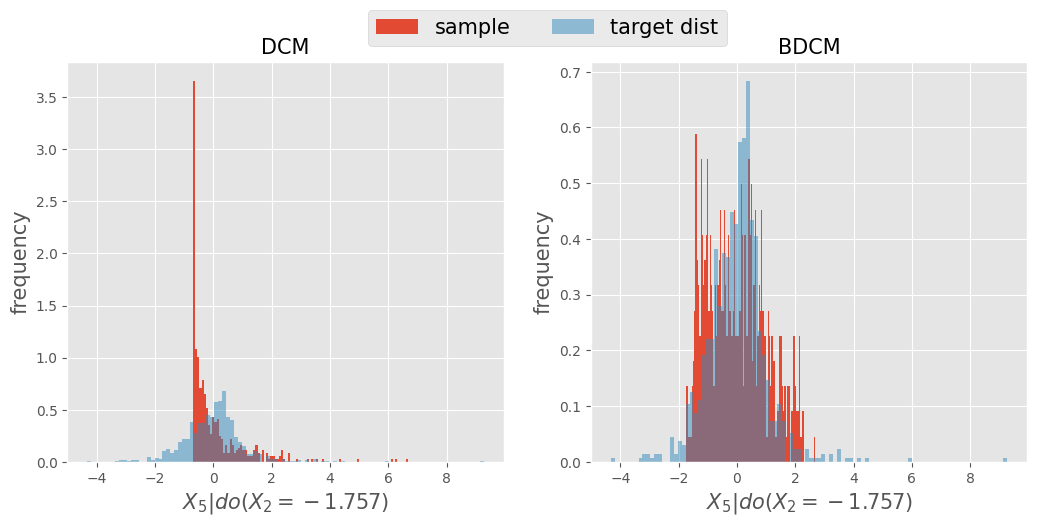

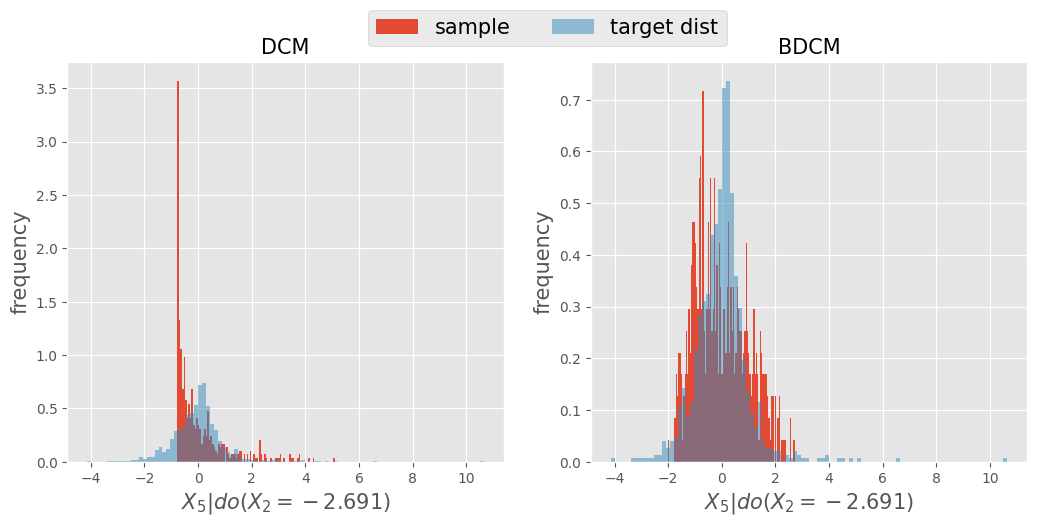

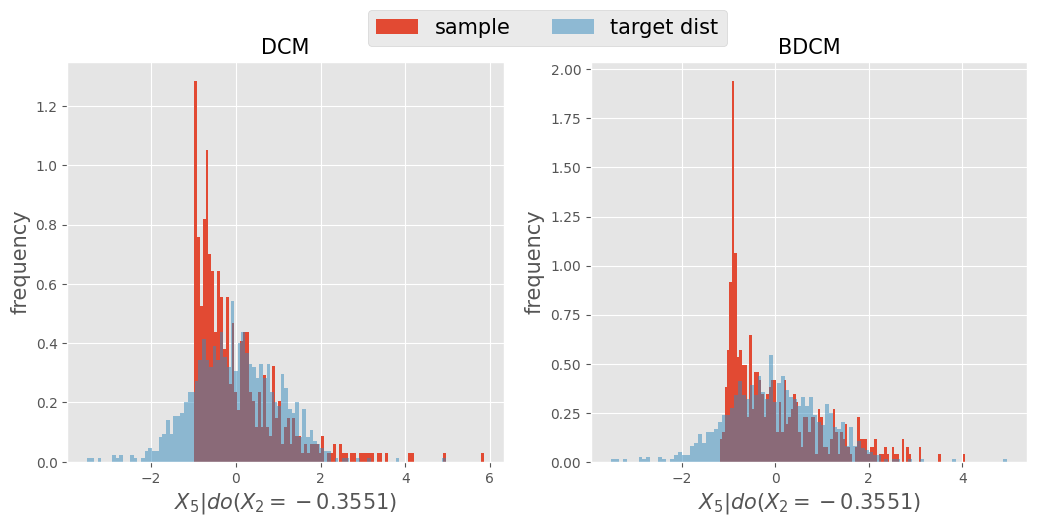

 80%|████████  | 4/5 [17:59<04:29, 269.21s/it]

mean of MMD for DCM: 0.00194
standard deviation of MMD for DCM: 0.000833
mean of MMD for BDCM: 0.00092
standard deviation of MMD for BDCM: 0.000593


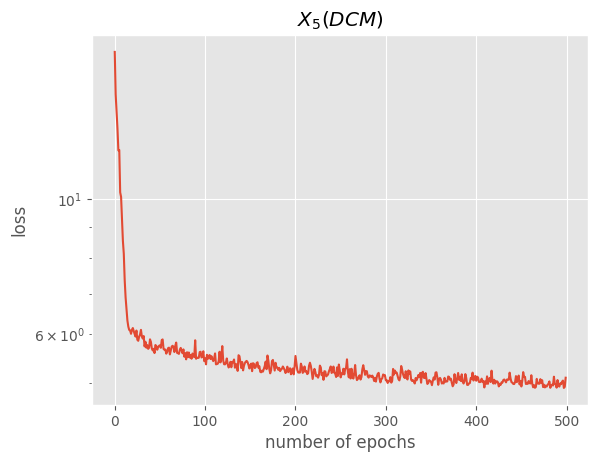

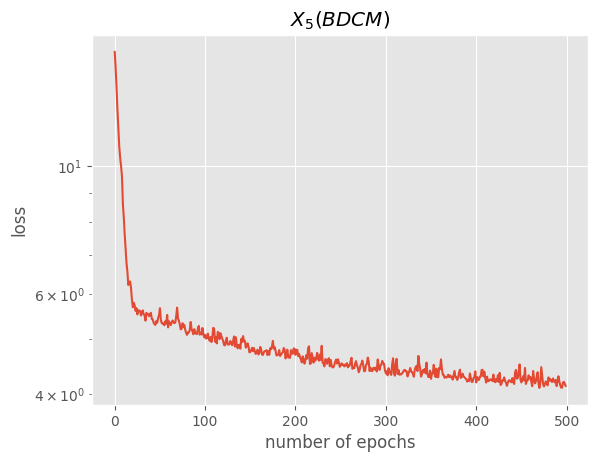

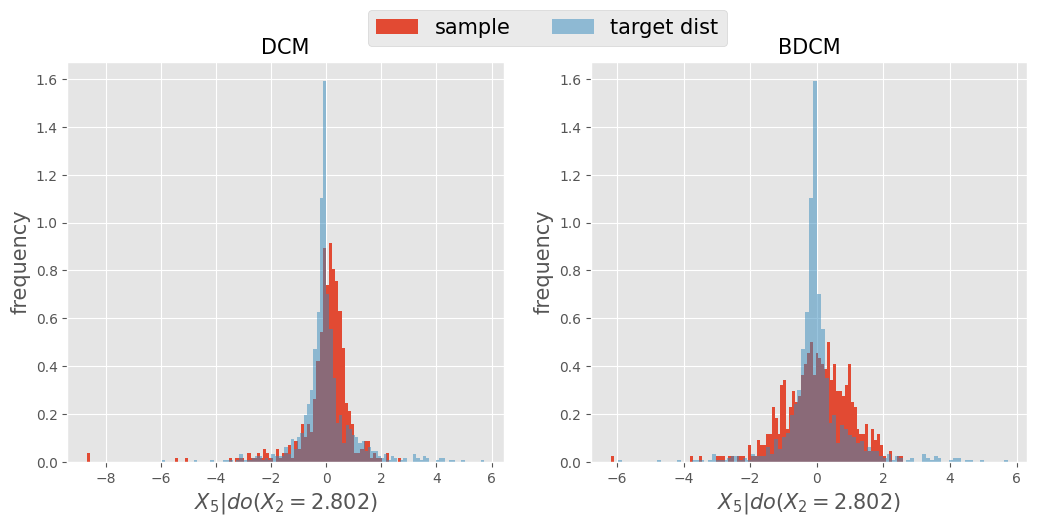

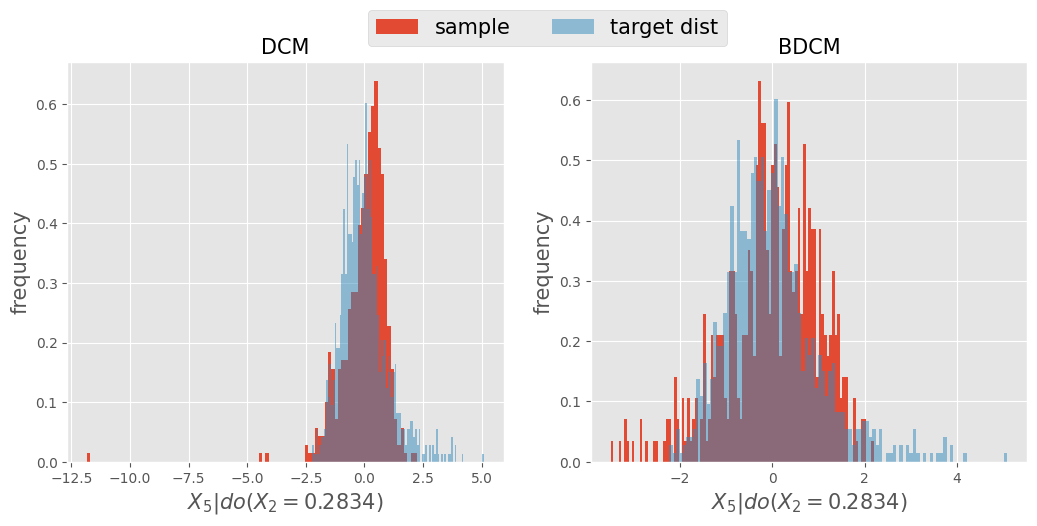

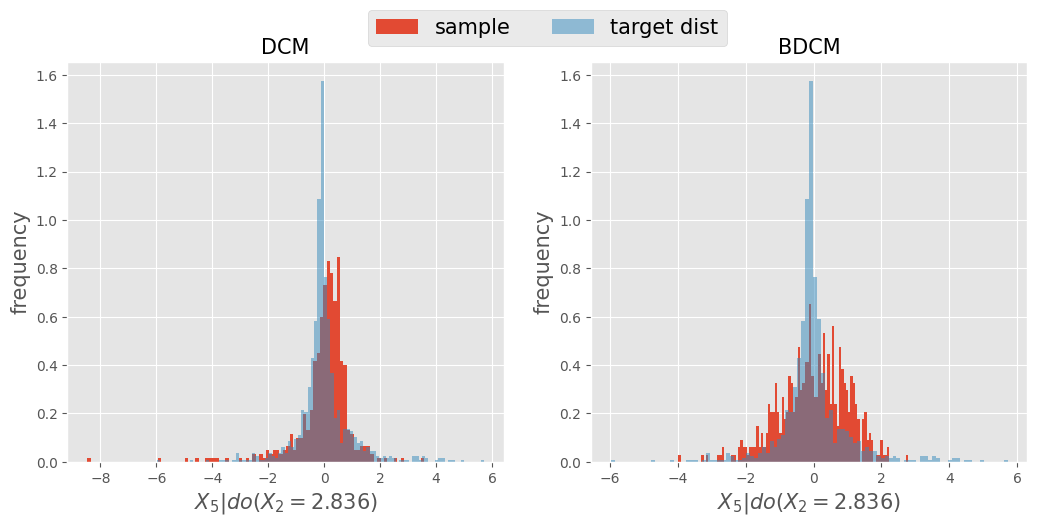

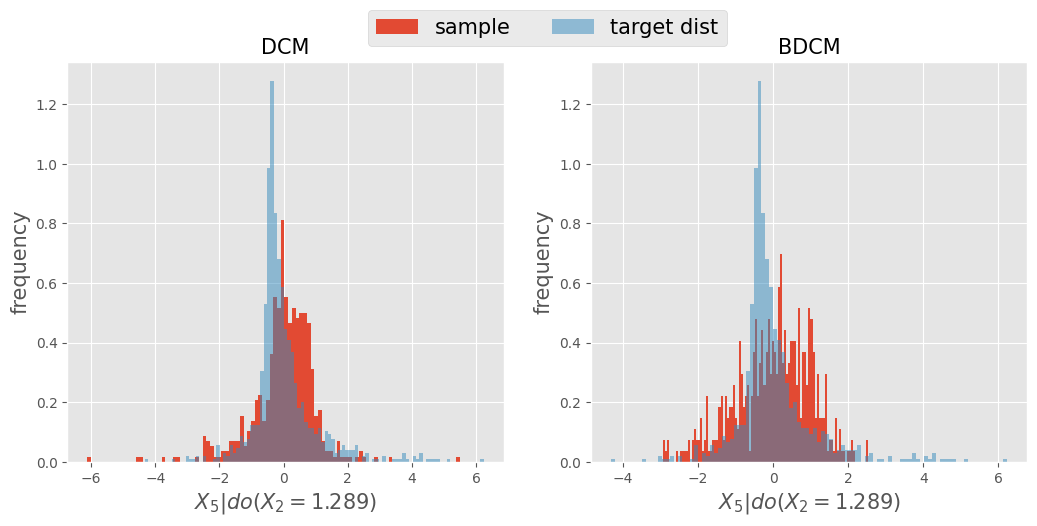

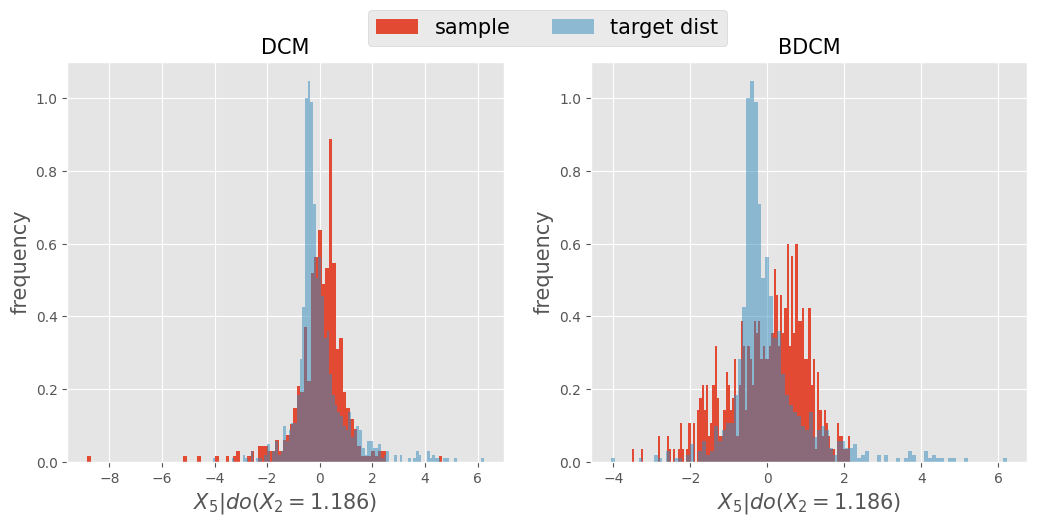

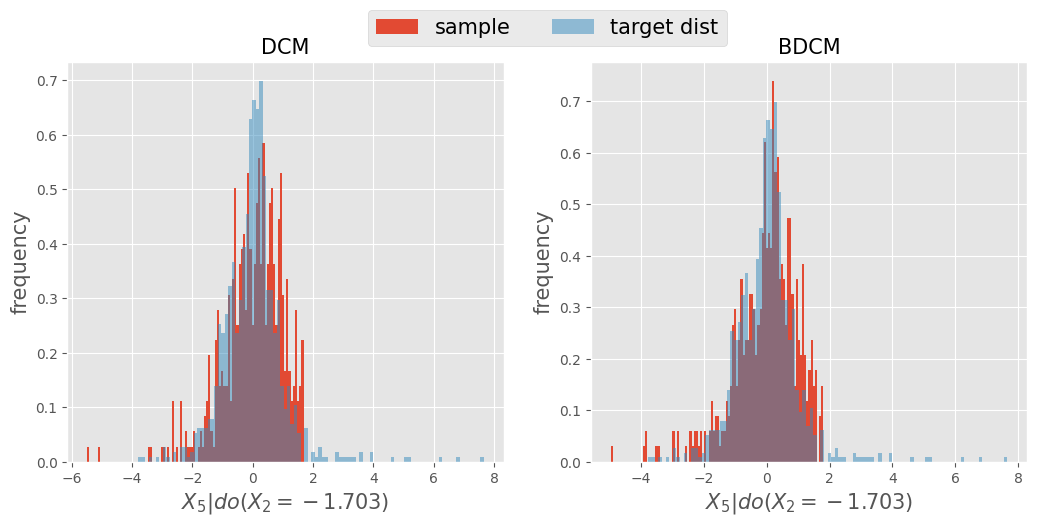

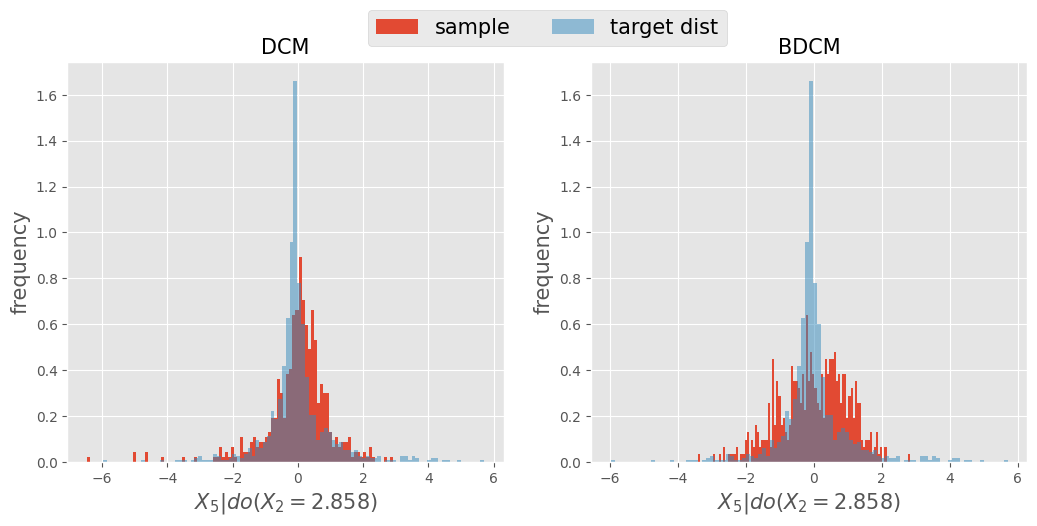

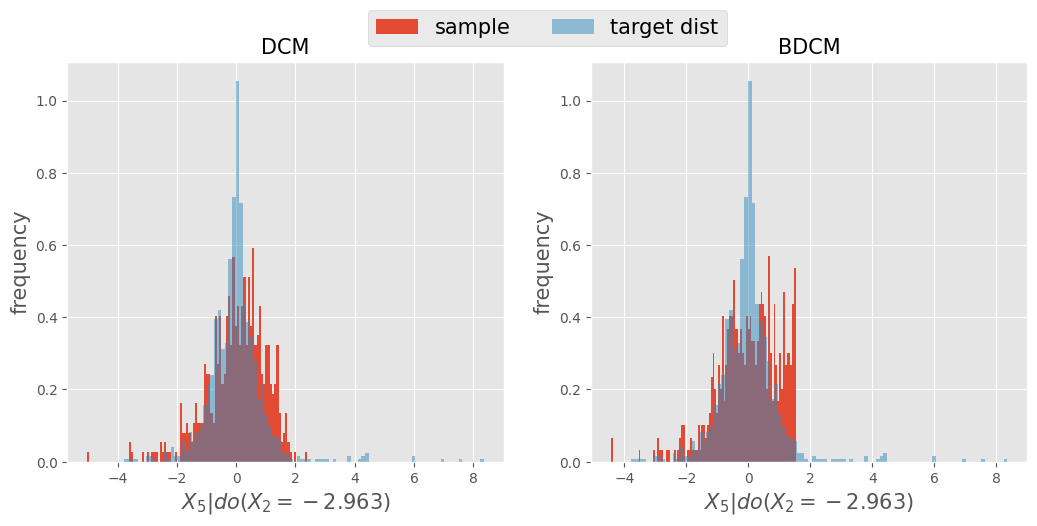

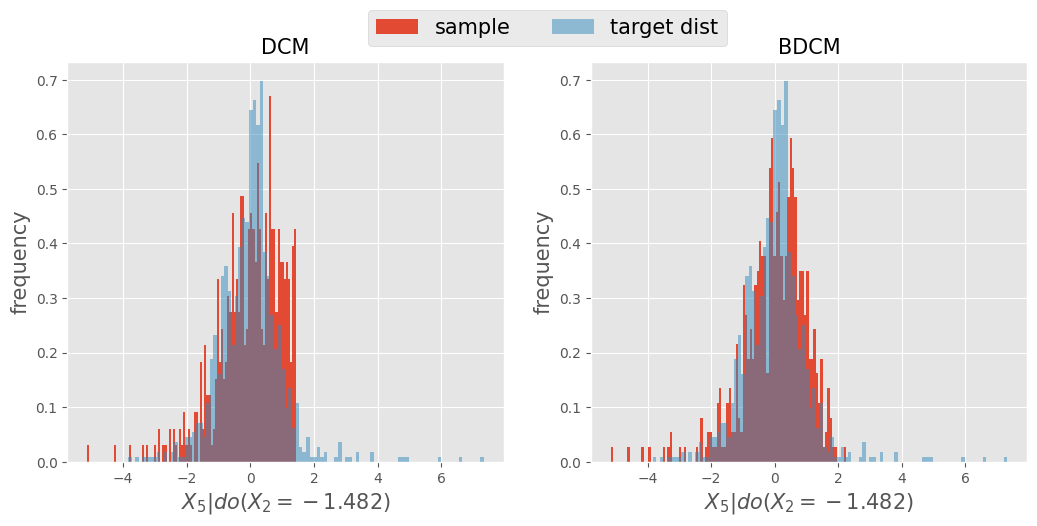

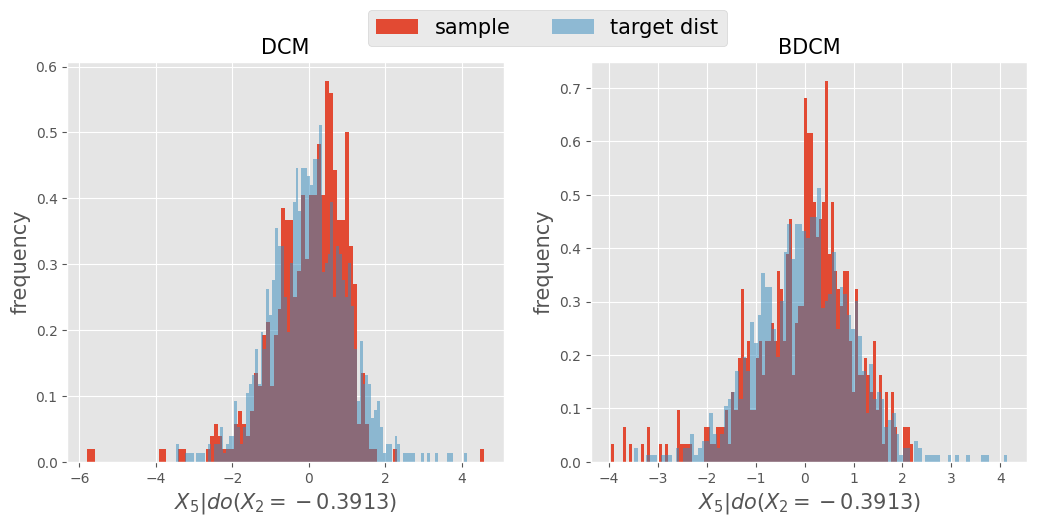

100%|██████████| 5/5 [22:30<00:00, 270.14s/it]

mean of MMD for DCM: 0.00149
standard deviation of MMD for DCM: 0.000492
mean of MMD for BDCM: 0.00107
standard deviation of MMD for BDCM: 0.000421
mean of all MMD for DCM: 0.00234
standard deviation of all MMD for DCM: 0.00217
mean of all MMD for BDCM: 0.00104
standard deviation of all MMD for BDCM: 0.000835


In [2]:
# Define the structual equation
# X_i = f_i(X_{pa_i}) + U_i

def structural_eq(u, ind, x):
    if ind == 0:
        output = u
    elif ind == 1:
        output = np.sqrt(abs(x[0])) * (abs(u) + 0.1) / 2 + abs(x[0]) + u / 5
    elif ind == 2:
        output = 1 / (1 + (abs(u) + 0.1) * np.exp(- x[1]))
    elif ind == 3:
        output = x[2] + x[2] * u + u
    elif ind == 4:
        output = x[1] + x[3] + x[1] * x[3] * u + u
    return normalize(output)

SCM1(structural_eq=structural_eq, simple_or_complex = "complex")